## Business Understanding

Brief description

 The dataset contains information about Airbnb listings in Seattle, including details about the properties, pricing, and reviews. 
We aim to explore various questions related to pricing, factors influencing rental prices, and guest satisfaction.

Question 1: How does pricing vary across different neighborhoods in Seattle?

Question 2: What are the most influential factors affecting rental prices?

Question 3: How do guests rate their Airbnb experiences, and what aspects contribute to overall satisfaction?

In [11]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding

Gather

Load the dataset

In [12]:
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')
calendar_df = pd.read_csv('calendar.csv')

### Prepare Data
Clean

In [13]:
# Clean the price column by removing '$' and ',' and converting it to float
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Question 1: How does pricing vary across different neighborhoods in Seattle?

The pricing of Airbnb listings varies significantly across different neighborhoods in Seattle. We expect to observe differences in pricing distribution among neighborhoods due to factors such as location, amenities, and demand.

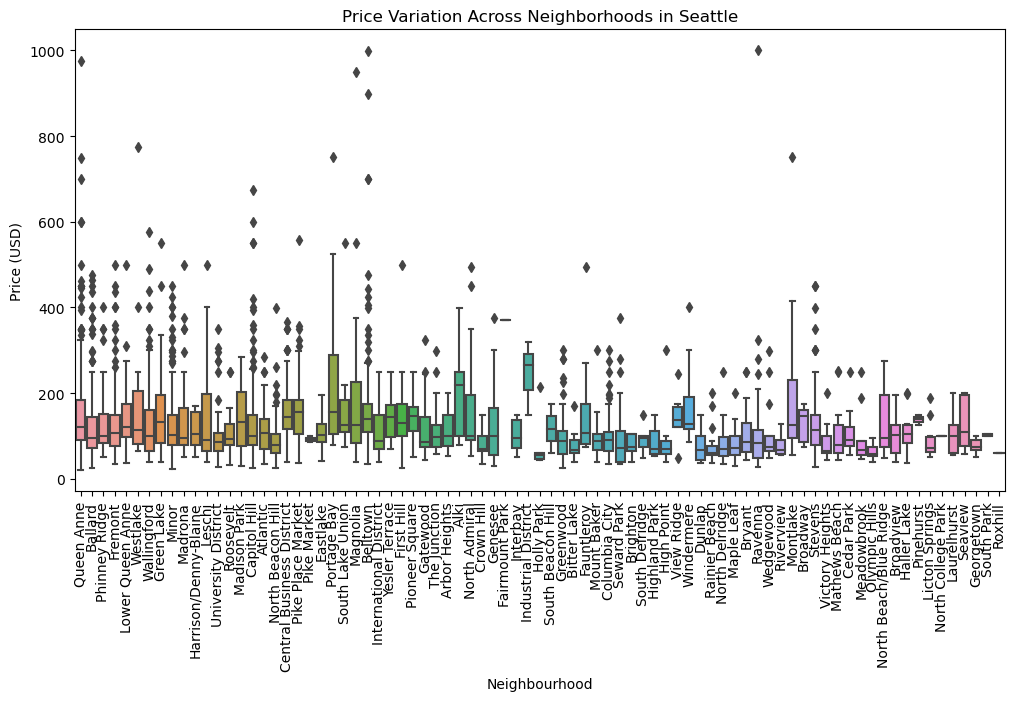

In [14]:
# Visualise
# Plot the boxplot showing price variation across neighborhoods
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood', y='price', data=listings_df)
plt.title('Price Variation Across Neighborhoods in Seattle')
plt.xlabel('Neighbourhood')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.show()

The boxplot visualization indicates significant variation in prices across different neighborhoods in Seattle. This suggests that location plays a crucial role in determining rental prices.

# Question 2: What are the most influential factors affecting rental prices?

There are certain factors that significantly influence the rental prices of Airbnb listings. We anticipate that features such as the number of bedrooms, bathrooms, square footage, and overall accommodation capacity would have a strong correlation with rental prices.

In [15]:
# For this question, we can perform a correlation analysis between price and other numerical features
correlation_matrix = listings_df.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Display the top correlated features
print("Top correlated features with price:")
print(price_correlation.head(10))


Top correlated features with price:
price                        1.000000
accommodates                 0.652218
bedrooms                     0.627720
beds                         0.589525
square_feet                  0.531752
bathrooms                    0.516424
guests_included              0.392875
host_listings_count          0.093962
host_total_listings_count    0.093962
review_scores_location       0.075069
Name: price, dtype: float64


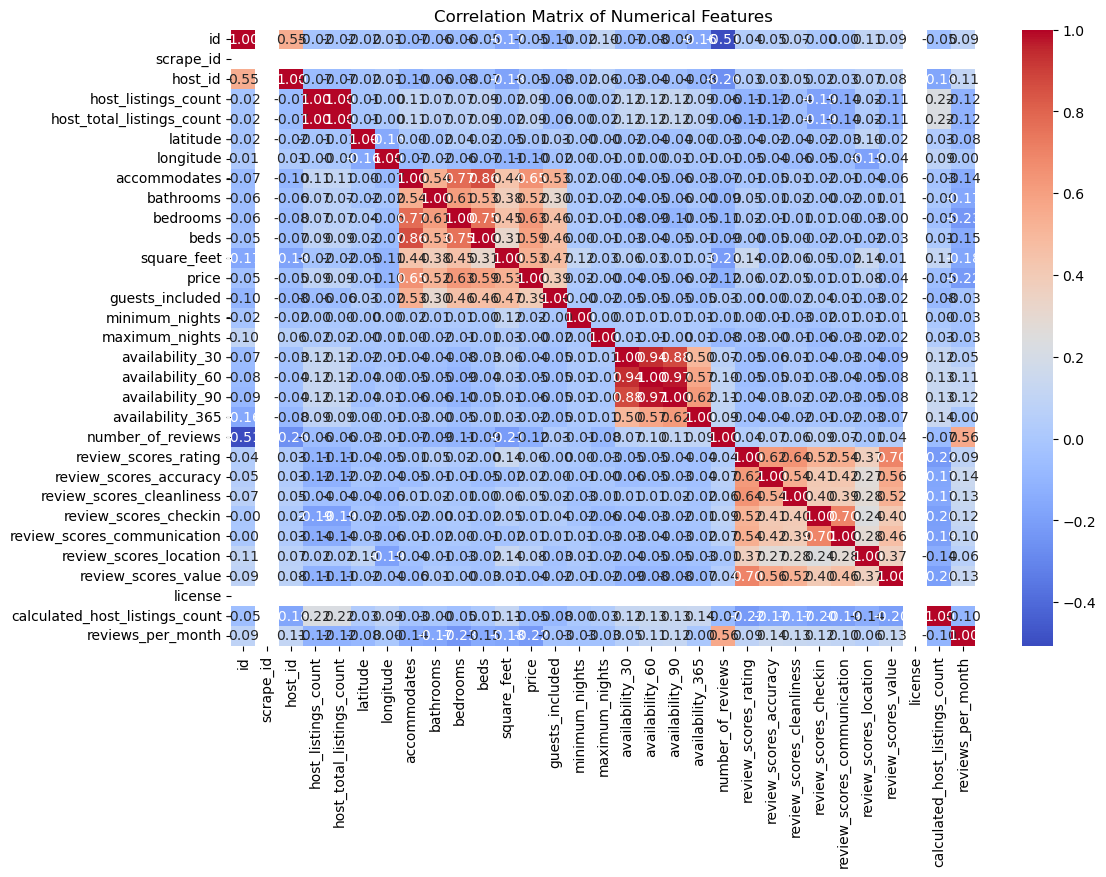

In [16]:
# Define a function to calculate correlation matrix and visualize it
def visualize_correlation(data):
    """
    Calculate the correlation matrix of numerical features and visualize it as a heatmap.

    Args:
    data (DataFrame): The input DataFrame containing numerical features.

    Returns:
    None
    """
    # Calculate correlation matrix
    correlation_matrix = data.corr()

    # Plot heatmap of correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# Visualise
# Call the function to visualize correlation matrix
visualize_correlation(listings_df)

The correlation analysis reveals that features such as accommodates, bedrooms, and bathrooms are highly correlated with rental prices. This suggests that property size and amenities significantly influence rental prices.

 # Question 3: How do guests rate their Airbnb experiences, and what aspects contribute to overall satisfaction?

The rating scores provided by guests reflect their overall satisfaction with their Airbnb experiences. We expect that aspects such as cleanliness, location, communication with the host, and amenities provided would contribute to higher overall satisfaction ratings.

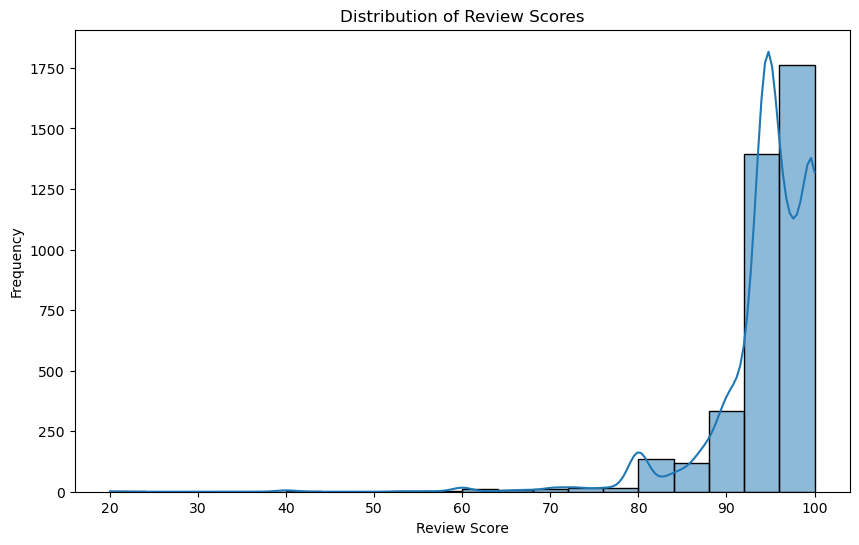

In [17]:
# Clean the review_scores_rating column by filling missing values with the mean
listings_df['review_scores_rating'] = listings_df['review_scores_rating'].fillna(listings_df['review_scores_rating'].mean())

# Visualise
# Plot a histogram of review scores
plt.figure(figsize=(10, 6))
sns.histplot(listings_df['review_scores_rating'], bins=20, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

The histogram visualization indicates that most guests tend to give high review scores, indicating overall satisfaction with their Airbnb experiences. However, there is still a significant proportion of listings with lower review scores, suggesting areas for improvement in guest satisfaction.